# Foco da Analise, primeiras impressões


Realizar uma clusterização com as seguintes colunas, para compreender quais são os perfis de carros que mais vendidos por cada perfil de cliente: 
        'Tipo de Cliente', 'Marca do Carro', 'Ano de Fabricação do Carro', 'Quilometragem do Carro no Momento da Venda', 'Tipo de Combustível','Tipo de Transmissão', 'Preço de Venda (R$)','Histórico de Aluguel (se aplicável)', 'Cancelamento da Venda'

Realizar com as seguintes colunas, para conseguir uma métrica de receita:
        'Data da Venda','Preço de Venda (R$)','Forma de Pagamento','Status do Pagamento', 'Desconto para Ex-cliente de Aluguel (%)', 'Cancelamento da Venda'

Realizar com as seguintes colunas, para conseguiur encontrar o perfil dos clientes mais valiosos:
        'Tipo de Cliente', 'Histórico de Aluguel (se aplicável)', 'Cancelamento da Venda', 'Motivo do Cancelamento (se aplicável)'

Analise do porque ocorrem cancelamentos das compras:
        'Cancelamento da Venda', 'Motivo do Cancelamento (se aplicável)'

Apagar coluna coerente, True para todas as linhas

In [54]:
# Importação das bibliotecas para analise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [55]:
db_vendas = pd.read_csv('historico_vendas.csv')

In [56]:
display(db_vendas.columns)
display(db_vendas.head())

Index(['ID do Cliente', 'Tipo de Cliente', 'Data da Venda',
       'ID do Carro Vendido', 'Marca do Carro', 'Ano de Fabricação do Carro',
       'Quilometragem do Carro no Momento da Venda', 'Tipo de Combustível',
       'Tipo de Transmissão', 'Preço de Venda (R$)', 'Forma de Pagamento',
       'Status do Pagamento', 'Histórico de Aluguel (se aplicável)',
       'ID do Contrato de Aluguel Anterior (se aplicável)',
       'Desconto para Ex-cliente de Aluguel (%)', 'Cancelamento da Venda',
       'Motivo do Cancelamento (se aplicável)', 'Coerente'],
      dtype='object')

,ID do Cliente,Tipo de Cliente,Data da Venda,ID do Carro Vendido,Marca do Carro,Ano de Fabricação do Carro,Quilometragem do Carro no Momento da Venda,Tipo de Combustível,Tipo de Transmissão,Preço de Venda (R$),Forma de Pagamento,Status do Pagamento,Histórico de Aluguel (se aplicável),ID do Contrato de Aluguel Anterior (se aplicável),Desconto para Ex-cliente de Aluguel (%),Cancelamento da Venda,Motivo do Cancelamento (se aplicável),Coerente
0,67593.0,b2c,13/05/2023,516713.0,voLKSWAGEn,2022.0,37656.0,HÍbridO,aUTOmÁTIcA,135375.00,TRanSfeRênCIA BanCáRIa,comPLETO,NÃo,NaN,0.0,NÃo,NaN,True
1,88684.0,B2b,03 de March de 2022,562471.0,cHEvRoLET,2013.0,214637.0,gaSoLIna,AuTomÁtICa,72948.61,FiNaNCIAmeNTo,EM AndamenTo,nãO,NaN,0.0,Não,NaN,True
2,60203.0,b2c,13/02/2023,367386.0,voLkSWaGEN,2016.0,134394.0,HÍBRiDO,AutoMáTIcA,89561.76,FInAncIAmEnto,em ANdAMEntO,nÃO,NaN,0.0,siM,FiNaNciAMEnTO NEgadO,True
3,40452.0,B2C,03 de August de 2023,126368.0,chEVrolet,2013.0,194853.0,híBrIDo,aUTOMÁticA,76788.01,TransFErência bANcÁRIa,cOmpLEto,NÃo,NaN,0.0,Não,NaN,True
4,83528.0,b2c,21/04/2022,988253.0,TOYoTA,2018.0,116024.0,eLÉtRiCo,AUtoMáTica,99237.41,finANcIameNto,Em AndAMeNtO,NÃO,NaN,0.0,NÃO,NaN,True


In [57]:

db_vendas['Coerente'].value_counts()

True    23007
Name: Coerente, dtype: int64

In [58]:
db_vendas['ID do Contrato de Aluguel Anterior (se aplicável)'].value_counts()

43670.0    4
26307.0    4
51782.0    3
61672.0    3
54858.0    3
          ..
81610.0    1
80229.0    1
54076.0    1
80481.0    1
3511.0     1
Name: ID do Contrato de Aluguel Anterior (se aplicável), Length: 5367, dtype: int64

# Inicio da Limpeza de dados

In [59]:
db_alterado = db_vendas
db_alterado.shape

(23027, 18)

In [60]:
# apagando a coluna coerente: 
db_alterado = db_alterado.drop(['ID do Cliente','Coerente','ID do Carro Vendido'], axis=1)

### Tirando colunas inteiras de nans

In [61]:
db_alterado.dropna(how='all', inplace=True)

db_alterado.shape

(23007, 15)

In [62]:
# Filter rows with any NaN values
colunas = [
 'Tipo de Cliente',
 'Data da Venda',
 'Marca do Carro',
 'Ano de Fabricação do Carro',
 'Quilometragem do Carro no Momento da Venda',
 'Tipo de Combustível',
 'Tipo de Transmissão',
 'Preço de Venda (R$)',
 'Forma de Pagamento',
 'Status do Pagamento',
 'Histórico de Aluguel (se aplicável)',
 'ID do Contrato de Aluguel Anterior (se aplicável)',
 'Desconto para Ex-cliente de Aluguel (%)',
 'Cancelamento da Venda',
 'Motivo do Cancelamento (se aplicável)'
 ]
i = 0
for coluna in colunas:
    i+=1
    if db_alterado[coluna].isna().any() == True:
        print(f"{True}" + " " + "na coluna" + " " + coluna)
    
print(i,len(db_alterado.shape))

db_vendas.shape

True na coluna ID do Contrato de Aluguel Anterior (se aplicável)
True na coluna Motivo do Cancelamento (se aplicável)
15 2


(23027, 18)

### Tirando linhas duplicadas 

In [63]:
db_alterado = db_alterado.drop_duplicates()

db_alterado.shape

(23007, 15)

### Tratando tipo do cliente:

In [64]:
db_alterado['Tipo de Cliente'] = db_alterado['Tipo de Cliente'].str.lower().str.strip()

In [65]:
db_alterado['Tipo de Cliente'].unique()

array(['b2c', 'b2b'], dtype=object)

### Tratando Data de venda

In [66]:
db_alterado['Data da Venda'].dtype #ou seja eh uma string 

data_venda = db_alterado['Data da Venda']


def convert_to_month_year(date_str):
    if isinstance(date_str, str):
        # First, check if the date is already in the yyyy-mm-dd format
        if re.match(r'\d{4}-\d{2}-\d{2}', date_str):
            return pd.to_datetime(date_str).strftime('%Y-%m')  # Convert and format as Year-Month
        
        # Check for the dd/mm/yyyy format
        elif re.match(r'\d{2}/\d{2}/\d{4}', date_str):
            return pd.to_datetime(date_str, dayfirst=True).strftime('%Y-%m')  # Convert and format as Year-Month
        
        # Handle verbose format like '03 de August de 2023'
        match = re.match(r'(\d{1,2}) de (\w+) de (\d{4})', date_str)
        if match:
            day, month, year = match.groups()
            # Mapping Portuguese/English month names to their corresponding numbers
            months_mapping = {
                'january': '01', 'february': '02', 'march': '03', 'april': '04', 'may': '05',
                'june': '06', 'july': '07', 'august': '08', 'september': '09', 'october': '10',
                'november': '11', 'december': '12',
                'janeiro': '01', 'fevereiro': '02', 'março': '03', 'abril': '04', 'maio': '05',
                'junho': '06', 'julho': '07', 'agosto': '08', 'setembro': '09', 'outubro': '10',
                'novembro': '11', 'dezembro': '12'
            }
            month_num = months_mapping.get(month.lower(), None)
            if month_num:
                # Return in Year-Month format
                return f'{year}-{month_num}'


db_alterado['Data da Venda'] = data_venda.apply(convert_to_month_year)

"""for i in range(0,len(data_venda),15):
    display(data_venda[i:i+15])
"""


'for i in range(0,len(data_venda),15):\n    display(data_venda[i:i+15])\n'

In [67]:
display(data_venda)

0                  13/05/2023
1         03 de March de 2022
2                  13/02/2023
3        03 de August de 2023
4                  21/04/2022
                 ...         
23022              13/01/2022
23023              05/07/2024
23024              17/02/2023
23025              01/07/2024
23026              2023-04-19
Name: Data da Venda, Length: 23007, dtype: object

#### Filtro do ano de Fabricação

In [68]:
db_alterado['Ano de Fabricação do Carro'] = db_alterado['Ano de Fabricação do Carro'].astype(int)

#### onde possui nan:
* True na coluna ID do Contrato de Aluguel Anterior (se aplicável)
* True na coluna Motivo do Cancelamento (se aplicável)

In [69]:
#display(db_alterado['Ano de Fabricação do Carro'].head(2))

display(db_alterado.head(2))

,Tipo de Cliente,Data da Venda,Marca do Carro,Ano de Fabricação do Carro,Quilometragem do Carro no Momento da Venda,Tipo de Combustível,Tipo de Transmissão,Preço de Venda (R$),Forma de Pagamento,Status do Pagamento,Histórico de Aluguel (se aplicável),ID do Contrato de Aluguel Anterior (se aplicável),Desconto para Ex-cliente de Aluguel (%),Cancelamento da Venda,Motivo do Cancelamento (se aplicável)
0,b2c,2023-05,voLKSWAGEn,2022,37656.0,HÍbridO,aUTOmÁTIcA,135375.00,TRanSfeRênCIA BanCáRIa,comPLETO,NÃo,NaN,0.0,NÃo,NaN
1,b2b,2022-03,cHEvRoLET,2013,214637.0,gaSoLIna,AuTomÁtICa,72948.61,FiNaNCIAmeNTo,EM AndamenTo,nãO,NaN,0.0,Não,NaN


#### Filtrando todas as colunas que tem letras maiusculas

In [70]:
db_alterado = db_alterado.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

db_alterado = db_alterado.applymap(lambda x: x.strip().strip() if isinstance(x, str) else x)

In [71]:
display(db_alterado.head())

,Tipo de Cliente,Data da Venda,Marca do Carro,Ano de Fabricação do Carro,Quilometragem do Carro no Momento da Venda,Tipo de Combustível,Tipo de Transmissão,Preço de Venda (R$),Forma de Pagamento,Status do Pagamento,Histórico de Aluguel (se aplicável),ID do Contrato de Aluguel Anterior (se aplicável),Desconto para Ex-cliente de Aluguel (%),Cancelamento da Venda,Motivo do Cancelamento (se aplicável)
0,b2c,2023-05,volkswagen,2022,37656.0,híbrido,automática,135375.00,transferência bancária,completo,não,NaN,0.0,não,NaN
1,b2b,2022-03,chevrolet,2013,214637.0,gasolina,automática,72948.61,financiamento,em andamento,não,NaN,0.0,não,NaN
2,b2c,2023-02,volkswagen,2016,134394.0,híbrido,automática,89561.76,financiamento,em andamento,não,NaN,0.0,sim,financiamento negado
3,b2c,2023-08,chevrolet,2013,194853.0,híbrido,automática,76788.01,transferência bancária,completo,não,NaN,0.0,não,NaN
4,b2c,2022-04,toyota,2018,116024.0,elétrico,automática,99237.41,financiamento,em andamento,não,NaN,0.0,não,NaN


#### Filtrando o cancelamento da venda 

In [72]:
db_alterado["Cancelamento da Venda"].isna().any()

False

In [73]:
# Correctly filter rows where 'Cancelamento da Venda' is 'sim'
db_alterado["Cancelamento da Venda"] = db_alterado.loc[db_alterado["Cancelamento da Venda"] != "sim", "Cancelamento da Venda"]

db_alterado.dropna(subset=["Cancelamento da Venda"], inplace=True)


display(db_alterado['Cancelamento da Venda'])

db_alterado.shape

0        não
1        não
3        não
4        não
9        não
        ... 
23014    não
23017    não
23020    não
23025    nao
23026    não
Name: Cancelamento da Venda, Length: 11533, dtype: object

(11533, 15)

#### Arrumando ortografia das linhas, para contabilização correta:

Ex:

Histórico de Aluguel (se aplicável)
não    0.604179
sim    0.245730
n      0.079251
nao    0.070840

In [74]:

db_alterado['Tipo de Combustível'] = db_alterado['Tipo de Combustível'].replace({
    'elétrico': 'eletrico',
    'híbrido': 'hibrido'
})

db_alterado['Forma de Pagamento'] = db_alterado['Forma de Pagamento'].replace({
    'cartao de crédito': 'cartao de credito',
    'cartão de credito': 'cartao de credito',
    'cartão de crédito': 'cartao de credito',
    'transferência bancária' : 'transferencia bancaria'
})

db_alterado['Histórico de Aluguel (se aplicável)'] = db_alterado['Histórico de Aluguel (se aplicável)'].replace({
    'n': 'nao',
    'não': 'nao'
})

db_alterado['Cancelamento da Venda'] = db_alterado['Cancelamento da Venda'].replace({
    'n': 'nao',
    'não':'nao'
})



##### Concluindo a limpeza dos dados

tudo faz sentido, analisando todas as colunas esta tudo batendo

In [75]:
# Check the structure of the dataset
db_alterado.info()

# Check for missing values
db_alterado.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11533 entries, 0 to 23026
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Tipo de Cliente                                    11533 non-null  object 
 1   Data da Venda                                      11533 non-null  object 
 2   Marca do Carro                                     11533 non-null  object 
 3   Ano de Fabricação do Carro                         11533 non-null  int64  
 4   Quilometragem do Carro no Momento da Venda         11533 non-null  float64
 5   Tipo de Combustível                                11533 non-null  object 
 6   Tipo de Transmissão                                11533 non-null  object 
 7   Preço de Venda (R$)                                11533 non-null  float64
 8   Forma de Pagamento                                 11533 non-null  object 
 9   Status

Tipo de Cliente                                          0
Data da Venda                                            0
Marca do Carro                                           0
Ano de Fabricação do Carro                               0
Quilometragem do Carro no Momento da Venda               0
Tipo de Combustível                                      0
Tipo de Transmissão                                      0
Preço de Venda (R$)                                      0
Forma de Pagamento                                       0
Status do Pagamento                                      0
Histórico de Aluguel (se aplicável)                      0
ID do Contrato de Aluguel Anterior (se aplicável)     8699
Desconto para Ex-cliente de Aluguel (%)                  0
Cancelamento da Venda                                    0
Motivo do Cancelamento (se aplicável)                11533
dtype: int64

#### ANÁLISE EXPLORATÓRIA

Comecando para descobrir as medias, moda, mediana e quatils. 

In [76]:
db_alterado.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ano de Fabricação do Carro,11533.0,2015.932281,3.723841,2010.00,2013.00,2016.00,2019.00,2022.0
Quilometragem do Carro no Momento da Venda,11533.0,141387.147143,66379.704672,30007.00,84736.00,139608.00,196446.00,279915.0
Preço de Venda (R$),11533.0,92485.573950,22058.755114,62544.32,72948.61,85083.67,116067.14,135375.0
ID do Contrato de Aluguel Anterior (se aplicável),2834.0,42203.647848,24172.819905,33.00,21365.25,42485.00,63506.50,83620.0
Desconto para Ex-cliente de Aluguel (%),11533.0,2.423914,4.693747,0.00,0.00,0.00,0.00,15.0


In [77]:
db_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11533 entries, 0 to 23026
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Tipo de Cliente                                    11533 non-null  object 
 1   Data da Venda                                      11533 non-null  object 
 2   Marca do Carro                                     11533 non-null  object 
 3   Ano de Fabricação do Carro                         11533 non-null  int64  
 4   Quilometragem do Carro no Momento da Venda         11533 non-null  float64
 5   Tipo de Combustível                                11533 non-null  object 
 6   Tipo de Transmissão                                11533 non-null  object 
 7   Preço de Venda (R$)                                11533 non-null  float64
 8   Forma de Pagamento                                 11533 non-null  object 
 9   Status

#### Fazendo uma abordagem nas variáveis qualitativas, para entender melhor o comportamento delas, temos:

In [78]:
colunas = [
 'Tipo de Cliente',
 #'Data da Venda',
 'Marca do Carro',
 'Tipo de Combustível',
 'Tipo de Transmissão',
 'Forma de Pagamento',
 'Status do Pagamento',
 'Histórico de Aluguel (se aplicável)',
 'Cancelamento da Venda',
 'Motivo do Cancelamento (se aplicável)'
 ]

b2b    0.504292
b2c    0.495708
Name: Tipo de Cliente, dtype: float64

hyundai       0.150004
honda         0.146709
ford          0.143848
chevrolet     0.143154
nissan        0.142114
volkswagen    0.140293
toyota        0.133877
Name: Marca do Carro, dtype: float64

diesel      0.254574
gasolina    0.252406
hibrido     0.249805
eletrico    0.243215
Name: Tipo de Combustível, dtype: float64

manual        0.502038
automática    0.497962
Name: Tipo de Transmissão, dtype: float64

financiamento             0.337033
cartao de credito         0.336079
transferencia bancaria    0.326888
Name: Forma de Pagamento, dtype: float64

completo        0.662967
em andamento    0.337033
Name: Status do Pagamento, dtype: float64

nao    0.75427
sim    0.24573
Name: Histórico de Aluguel (se aplicável), dtype: float64

nao    1.0
Name: Cancelamento da Venda, dtype: float64

Series([], Name: Motivo do Cancelamento (se aplicável), dtype: float64)

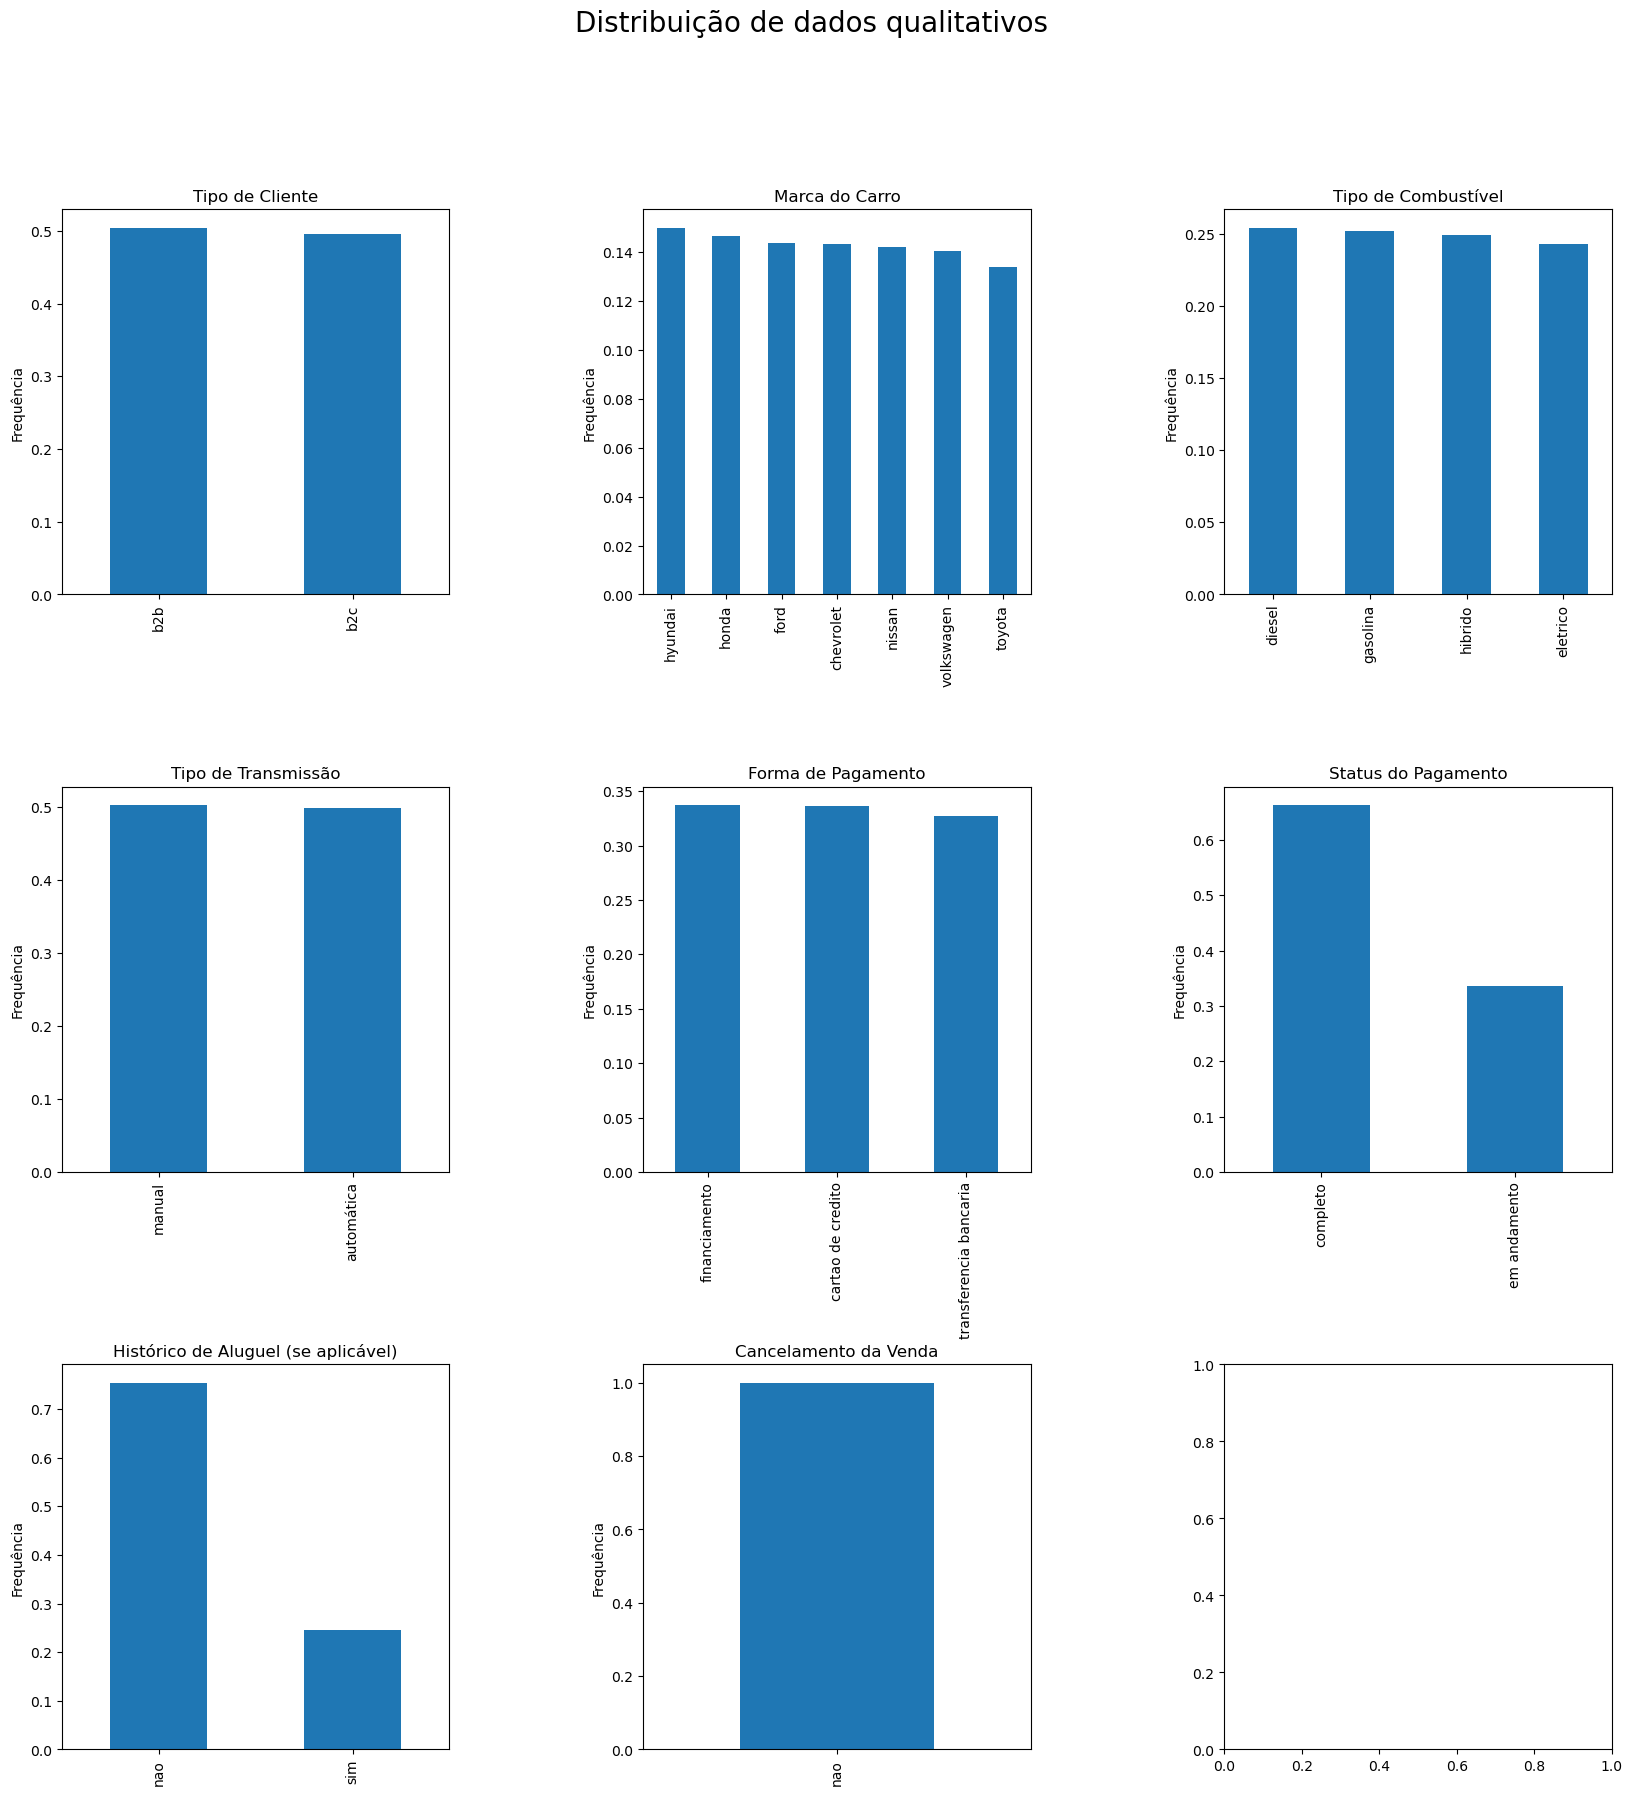

In [79]:
for coluna in colunas:
    display(db_alterado[coluna].value_counts(normalize = True))

import matplotlib.pyplot as plt

# List of qualitative columns from your 'db_alterado' dataset that can be used for future analyses
colunas_qualitativas = [
    'Tipo de Cliente', 
    'Marca do Carro', 
    'Tipo de Combustível', 
    'Tipo de Transmissão', 
    'Forma de Pagamento', 
    'Status do Pagamento', 
    'Histórico de Aluguel (se aplicável)', 
    'Cancelamento da Venda', 
]

# Create subplots with enough space for all qualitative columns
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # Adjust grid size based on the number of columns
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between subplots
fig.suptitle('Distribuição de dados qualitativos', fontsize=20)

# Iterate over each qualitative column and plot a bar chart
for col, ax in zip(colunas_qualitativas, axs.ravel()):
    if col in db_alterado.columns:
        db_alterado[col].value_counts(True).plot(kind='bar', ax=ax, title=col)
        ax.set_xlabel('')  # Remove x-axis label to avoid clutter
        ax.set_ylabel('Frequência')  # Set y-axis label to 'Frequência'

# Show the plot
plt.show()


##### Visualizando isso de maneira gráfica, temos: 

In [80]:
db_alterado.head()

,Tipo de Cliente,Data da Venda,Marca do Carro,Ano de Fabricação do Carro,Quilometragem do Carro no Momento da Venda,Tipo de Combustível,Tipo de Transmissão,Preço de Venda (R$),Forma de Pagamento,Status do Pagamento,Histórico de Aluguel (se aplicável),ID do Contrato de Aluguel Anterior (se aplicável),Desconto para Ex-cliente de Aluguel (%),Cancelamento da Venda,Motivo do Cancelamento (se aplicável)
0,b2c,2023-05,volkswagen,2022,37656.0,hibrido,automática,135375.00,transferencia bancaria,completo,nao,NaN,0.0,nao,NaN
1,b2b,2022-03,chevrolet,2013,214637.0,gasolina,automática,72948.61,financiamento,em andamento,nao,NaN,0.0,nao,NaN
3,b2c,2023-08,chevrolet,2013,194853.0,hibrido,automática,76788.01,transferencia bancaria,completo,nao,NaN,0.0,nao,NaN
4,b2c,2022-04,toyota,2018,116024.0,eletrico,automática,99237.41,financiamento,em andamento,nao,NaN,0.0,nao,NaN
9,b2b,2022-06,hyundai,2012,197486.0,gasolina,automática,69301.18,cartao de credito,completo,nao,NaN,0.0,nao,NaN


#### Agora podemos começar a analise para checar se tem alguma correlação entre elas:

In [81]:
# Group by 'Marca do Carro' and sum the 'Preço de Venda (R$)' to get the total revenue per brand
revenue_by_brand = db_alterado.groupby('Marca do Carro')['Preço de Venda (R$)'].sum()

# Display the table of revenue by car brand
display(revenue_by_brand)



Marca do Carro
chevrolet     1.529814e+08
ford          1.525955e+08
honda         1.560576e+08
hyundai       1.585916e+08
nissan        1.517760e+08
toyota        1.435762e+08
volkswagen    1.510579e+08
Name: Preço de Venda (R$), dtype: float64

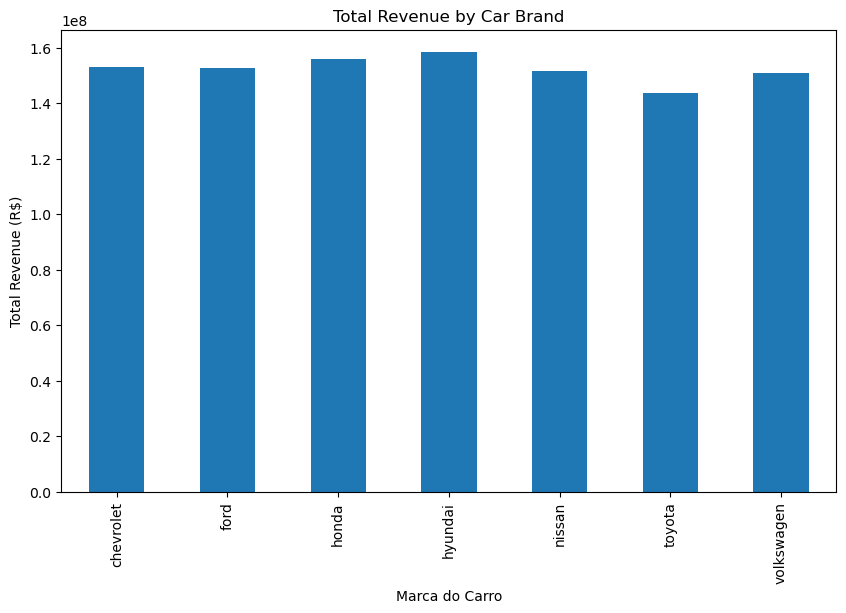

In [82]:
#Vamos buscar entender qual carro marca de carro agrega mais na receita da nossa empresa



# Plot total revenue by car brand
revenue_by_brand.plot(kind='bar', figsize=(10, 6), title='Total Revenue by Car Brand')
plt.ylabel('Total Revenue (R$)')
plt.show()


O que podemos concluir é que _não importa_ de maneira significativa a marca do carro, ou seja, a receita das vendas não dependem da marca.

analisar mes a mes, talvez seja uma boa.

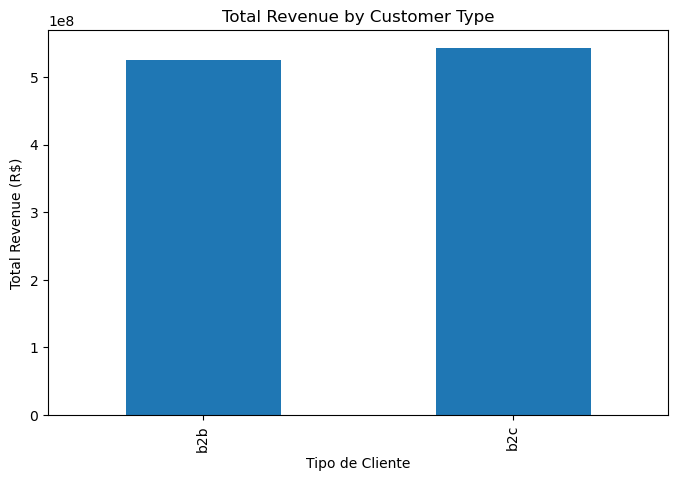

In [83]:
# Calculate total revenue by customer type
revenue_by_customer_type = db_alterado.groupby('Tipo de Cliente')['Preço de Venda (R$)'].sum()

# Plot total revenue by customer type
revenue_by_customer_type.plot(kind='bar', figsize=(8, 5), title='Total Revenue by Customer Type') 
plt.ylabel('Total Revenue (R$)')
plt.show()


Pode-se concluir que b2c agrega mais receita, no entanto, não altera de maneira signficativa também, talvez seja interessante buscar outro fator que seja mais preponderante.

#### Vamos analisar se ha alguma relação com o ano do carro, ou seja, se o carro é mais novo se a receita é maior.

In [84]:
db_alterado['Ano de Fabricação do Carro'].value_counts()


2017    978
2016    916
2011    910
2010    906
2012    902
2015    896
2013    879
2021    877
2014    867
2019    863
2018    860
2022    846
2020    833
Name: Ano de Fabricação do Carro, dtype: int64

Correlation between 'Ano de Fabricação do Carro' and total revenue: 0.9844851460275544


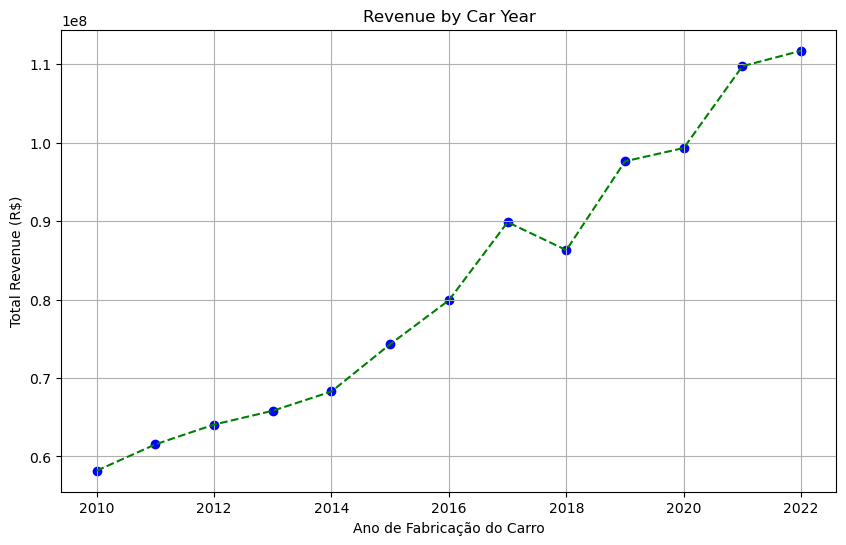

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Ano de Fabricação do Carro' and calculate total revenue by year
revenue_by_year = db_alterado.groupby('Ano de Fabricação do Carro')['Preço de Venda (R$)'].sum()

# Reset the index so that 'Ano de Fabricação do Carro' becomes a column
revenue_by_year = revenue_by_year.reset_index()

# Calculate the correlation between 'Ano de Fabricação do Carro' and 'Preço de Venda (R$)'
correlation = revenue_by_year['Ano de Fabricação do Carro'].corr(revenue_by_year['Preço de Venda (R$)'])

# Print the correlation result
print(f"Correlation between 'Ano de Fabricação do Carro' and total revenue: {correlation}")

# Plot the relationship between 'Ano de Fabricação do Carro' and total revenue
plt.figure(figsize=(10, 6))
plt.scatter(revenue_by_year['Ano de Fabricação do Carro'], revenue_by_year['Preço de Venda (R$)'], color='blue')
plt.plot(revenue_by_year['Ano de Fabricação do Carro'], revenue_by_year['Preço de Venda (R$)'], color='green', linestyle='--')
plt.title('Revenue by Car Year')
plt.xlabel('Ano de Fabricação do Carro')
plt.ylabel('Total Revenue (R$)')
plt.grid(True)
plt.show()


Correlation between 'Ano de Fabricação do Carro' and total revenue: 0.9824469513971803


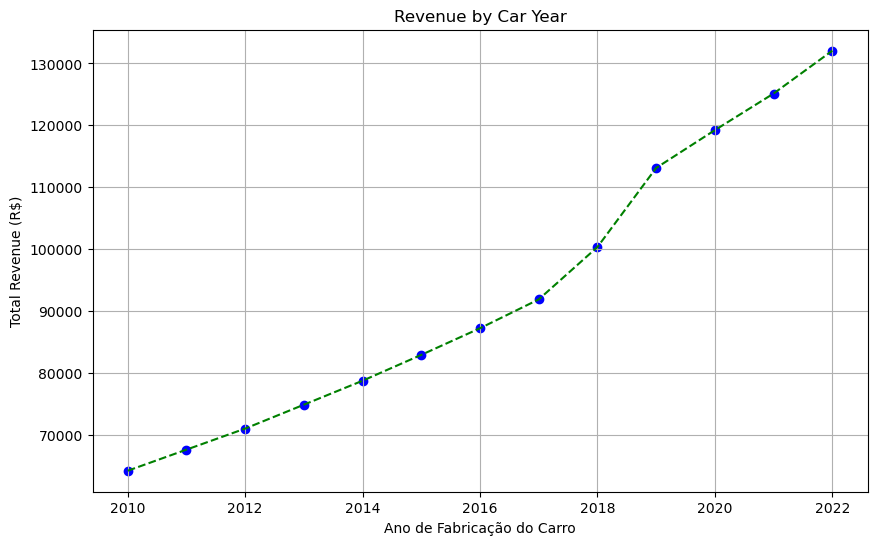

In [86]:


# Group by 'Ano de Fabricação do Carro' and calculate total revenue by year
revenue_by_year = db_alterado.groupby('Ano de Fabricação do Carro')['Preço de Venda (R$)'].mean()

# Reset the index so that 'Ano de Fabricação do Carro' becomes a column
revenue_by_year = revenue_by_year.reset_index()

# Calculate the correlation between 'Ano de Fabricação do Carro' and 'Preço de Venda (R$)'
correlation = revenue_by_year['Ano de Fabricação do Carro'].corr(revenue_by_year['Preço de Venda (R$)'])

# Print the correlation result
print(f"Correlation between 'Ano de Fabricação do Carro' and total revenue: {correlation}")

# Plot the relationship between 'Ano de Fabricação do Carro' and total revenue
plt.figure(figsize=(10, 6))
plt.scatter(revenue_by_year['Ano de Fabricação do Carro'], revenue_by_year['Preço de Venda (R$)'], color='blue')
plt.plot(revenue_by_year['Ano de Fabricação do Carro'], revenue_by_year['Preço de Venda (R$)'], color='green', linestyle='--')
plt.title('Revenue by Car Year')
plt.xlabel('Ano de Fabricação do Carro')
plt.ylabel('Total Revenue (R$)')
plt.grid(True)
plt.show()

Pelo grafico, pode se concluir que quanto maior o ano, mais receita ela gera, o que é intuitivo. No entanto, vamos entender na proporção se isso tambem é verdade.

In [87]:
# Step 1: Group by 'Ano de Fabricação do Carro' and calculate total revenue by year
revenue_by_year = db_alterado.groupby('Ano de Fabricação do Carro')['Preço de Venda (R$)'].sum()

# Step 2: Calculate the overall total revenue
total_revenue = revenue_by_year.sum()

# Step 3: Calculate the proportion of revenue by year
proportion_by_year = (revenue_by_year / total_revenue)* 100 #%


# Display the proportion
print(proportion_by_year)


Ano de Fabricação do Carro
2010     5.454165
2011     5.768839
2012     6.005780
2013     6.170693
2014     6.401121
2015     6.966159
2016     7.491076
2017     8.424939
2018     8.090613
2019     9.152519
2020     9.311219
2021    10.288996
2022    10.473883
Name: Preço de Venda (R$), dtype: float64


#### Analisando quais marcas de carro possuem mais valor agregado

Marca do Carro
hyundai       1.585916e+08
honda         1.560576e+08
chevrolet     1.529814e+08
ford          1.525955e+08
nissan        1.517760e+08
volkswagen    1.510579e+08
toyota        1.435762e+08
Name: Preço de Venda (R$), dtype: float64


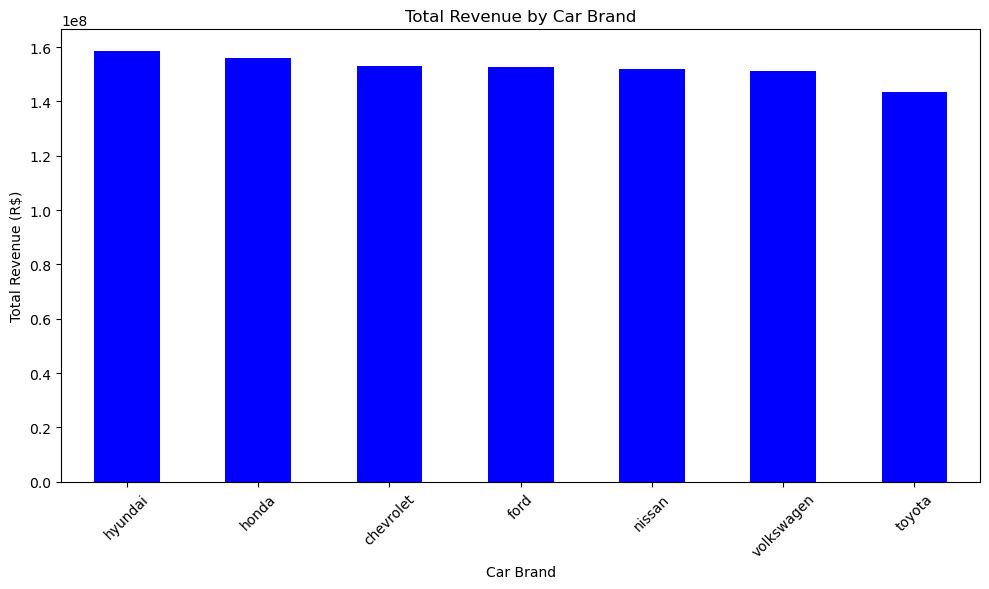

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Marca do Carro' and calculate total revenue by car brand
revenue_by_brand = db_alterado.groupby('Marca do Carro')['Preço de Venda (R$)'].sum().sort_values(ascending=False)

# Display the revenue by car brand as a table
print(revenue_by_brand)

# Plot the revenue by car brand
plt.figure(figsize=(10, 6))
revenue_by_brand.plot(kind='bar', color='blue')
plt.title('Total Revenue by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()


#### Analisando a proporção por ano de cada marca, temos:

In [89]:
# Group by 'Marca do Carro' and 'Ano de Fabricação do Carro', then sum the revenue
revenue_by_brand_and_year = db_alterado.groupby(['Marca do Carro', 'Ano de Fabricação do Carro'])['Preço de Venda (R$)'].sum()

# Group by 'Marca do Carro' only to get total revenue by brand
total_revenue_by_brand = db_alterado.groupby('Marca do Carro')['Preço de Venda (R$)'].sum()

# Calculate the proportion of revenue by year within each brand
proportion_by_brand_and_year = revenue_by_brand_and_year / total_revenue_by_brand

# Display the proportion by brand and year
display(proportion_by_brand_and_year['volkswagen'])

display(proportion_by_brand_and_year['chevrolet'])


Ano de Fabricação do Carro
2010    0.055286
2011    0.049410
2012    0.058264
2013    0.058662
2014    0.059984
2015    0.064295
2016    0.083124
2017    0.080447
2018    0.086418
2019    0.084750
2020    0.093983
2021    0.114297
2022    0.111081
Name: Preço de Venda (R$), dtype: float64

Ano de Fabricação do Carro
2010    0.049125
2011    0.051121
2012    0.057102
2013    0.061262
2014    0.066257
2015    0.077085
2016    0.078479
2017    0.097492
2018    0.080455
2019    0.087478
2020    0.094718
2021    0.102351
2022    0.097075
Name: Preço de Venda (R$), dtype: float64

##### Ainda não chegamos em nenhuma conclusão signficativa, então vou buscar analisar se há alguma ligação entre carros manuais e receita.

Tipo de Transmissão
automática    5.308075e+08
manual        5.358287e+08
Name: Preço de Venda (R$), dtype: float64


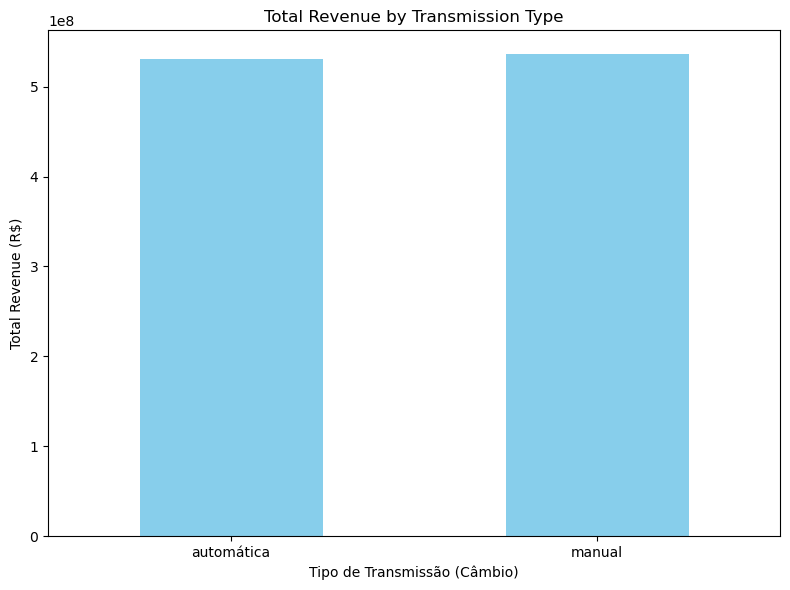

In [90]:
import matplotlib.pyplot as plt

# Group by 'Tipo de Transmissão' (câmbio) and calculate total revenue ('Preço de Venda (R$)')
revenue_by_cambio = db_alterado.groupby('Tipo de Transmissão')['Preço de Venda (R$)'].sum()

# Display the grouped revenue by transmission type
print(revenue_by_cambio)

# Plot the revenue by transmission type
plt.figure(figsize=(8, 6))
revenue_by_cambio.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Transmission Type')
plt.xlabel('Tipo de Transmissão (Câmbio)')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Não se pode concluir nada com esses gráficos, pois os valores são todos muito proximos, fazendo essa analise de cambio por preço, portanto, não é uma boa abordagem.

##### Como ambos os clientes juntos não nos resultam em nada muito significativo, vamos separar o db, para analisar de maneira mais setorizada, talvez isso nos ajude a concluir coisas. Assim: 

Analise inicial com clientes B2B

In [91]:
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente']=='b2b',:]

db_b2b.head()

,Tipo de Cliente,Data da Venda,Marca do Carro,Ano de Fabricação do Carro,Quilometragem do Carro no Momento da Venda,Tipo de Combustível,Tipo de Transmissão,Preço de Venda (R$),Forma de Pagamento,Status do Pagamento,Histórico de Aluguel (se aplicável),ID do Contrato de Aluguel Anterior (se aplicável),Desconto para Ex-cliente de Aluguel (%),Cancelamento da Venda,Motivo do Cancelamento (se aplicável)
1,b2b,2022-03,chevrolet,2013,214637.0,gasolina,automática,72948.61,financiamento,em andamento,nao,NaN,0.0,nao,NaN
9,b2b,2022-06,hyundai,2012,197486.0,gasolina,automática,69301.18,cartao de credito,completo,nao,NaN,0.0,nao,NaN
15,b2b,2024-06,volkswagen,2017,135289.0,eletrico,automática,89561.76,transferencia bancaria,completo,nao,NaN,0.0,nao,NaN
17,b2b,2024-04,honda,2014,183416.0,hibrido,manual,76788.01,transferencia bancaria,completo,sim,45717.0,10.0,nao,NaN
19,b2b,2023-12,honda,2012,195580.0,hibrido,automática,69301.18,transferencia bancaria,completo,nao,NaN,0.0,nao,NaN


Analisando as mesmas coisas mas para esses clientes em especifico:

In [92]:
qtd_marca = db_b2b['Marca do Carro'].value_counts()

qtd_marca

honda         902
hyundai       859
ford          838
volkswagen    811
chevrolet     805
nissan        802
toyota        799
Name: Marca do Carro, dtype: int64

In [93]:
marca_preco = db_b2b.groupby(['Marca do Carro','Ano de Fabricação do Carro'])['Preço de Venda (R$)']

display(marca_preco)

Calculando a receita gerada pela operação B2B: 

C:\Users\rique\AppData\Local\Temp\ipykernel_31144\4290954114.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2b['Data da Venda'] = pd.to_datetime(db_b2b['Data da Venda'], format='%Y-%m')
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\4290954114.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2b['Year'] = db_b2b['Data da Venda'].dt.year
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\4290954114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

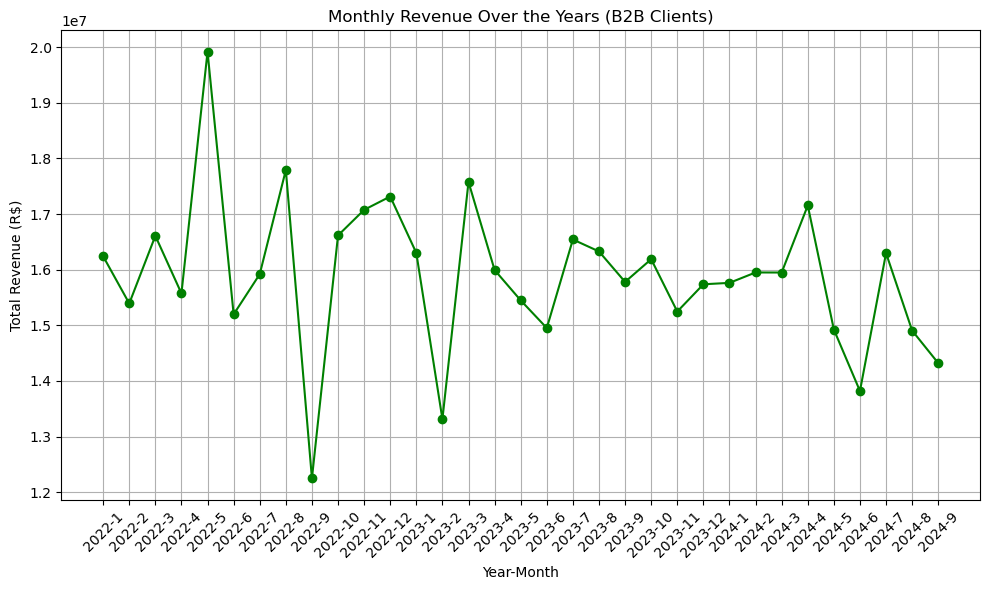

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only 'b2b' clients
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2b', :]

# Convert 'Data da Venda' to datetime if it's not already
db_b2b['Data da Venda'] = pd.to_datetime(db_b2b['Data da Venda'], format='%Y-%m')

# Extract year and month for the 'b2b' dataset
db_b2b['Year'] = db_b2b['Data da Venda'].dt.year
db_b2b['Month'] = db_b2b['Data da Venda'].dt.month

# Group by Year and Month and calculate total revenue for each month for 'b2b' clients
revenue_by_month_b2b = db_b2b.groupby(['Year', 'Month'])['Preço de Venda (R$)'].sum()

# Reset the index to flatten the grouped data for easier plotting
revenue_by_month_b2b = revenue_by_month_b2b.reset_index()

# Plot the revenue by month for 'b2b' clients
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month_b2b['Year'].astype(str) + '-' + revenue_by_month_b2b['Month'].astype(str), 
         revenue_by_month_b2b['Preço de Venda (R$)'], marker='o', color='green')
plt.title('Monthly Revenue Over the Years (B2B Clients)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\rique\AppData\Local\Temp\ipykernel_31144\414510627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2c['Data da Venda'] = pd.to_datetime(db_b2c['Data da Venda'], format='%Y-%m')
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\414510627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2c['Year'] = db_b2c['Data da Venda'].dt.year
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\414510627.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

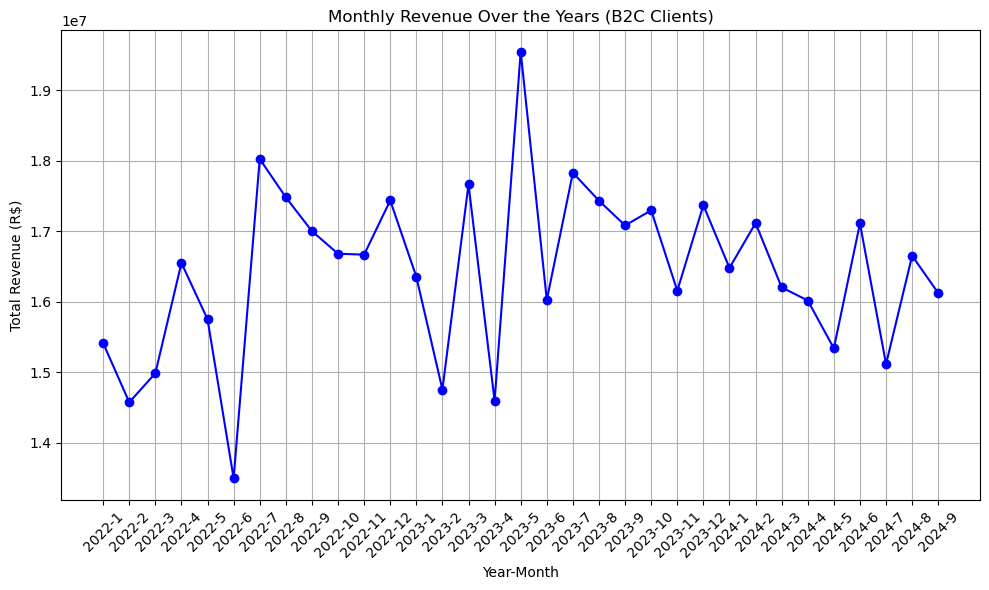

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only 'b2c' clients
db_b2c = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2c', :]

# Convert 'Data da Venda' to datetime if it's not already
db_b2c['Data da Venda'] = pd.to_datetime(db_b2c['Data da Venda'], format='%Y-%m')

# Extract year and month for the 'b2c' dataset
db_b2c['Year'] = db_b2c['Data da Venda'].dt.year
db_b2c['Month'] = db_b2c['Data da Venda'].dt.month

# Group by Year and Month and calculate total revenue for each month for 'b2c' clients
revenue_by_month_b2c = db_b2c.groupby(['Year', 'Month'])['Preço de Venda (R$)'].sum()

# Reset the index to flatten the grouped data for easier plotting
revenue_by_month_b2c = revenue_by_month_b2c.reset_index()

# Plot the revenue by month for 'b2c' clients
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month_b2c['Year'].astype(str) + '-' + revenue_by_month_b2c['Month'].astype(str), 
         revenue_by_month_b2c['Preço de Venda (R$)'], marker='o', color='blue')
plt.title('Monthly Revenue Over the Years (B2C Clients)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\rique\AppData\Local\Temp\ipykernel_31144\1937381085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2b['Data da Venda'] = pd.to_datetime(db_b2b['Data da Venda'], format='%Y-%m')
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\1937381085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b2c['Data da Venda'] = pd.to_datetime(db_b2c['Data da Venda'], format='%Y-%m')
C:\Users\rique\AppData\Local\Temp\ipykernel_31144\1937381085.py:13: SettingWithCopyWarning: 
A value is trying to be set 

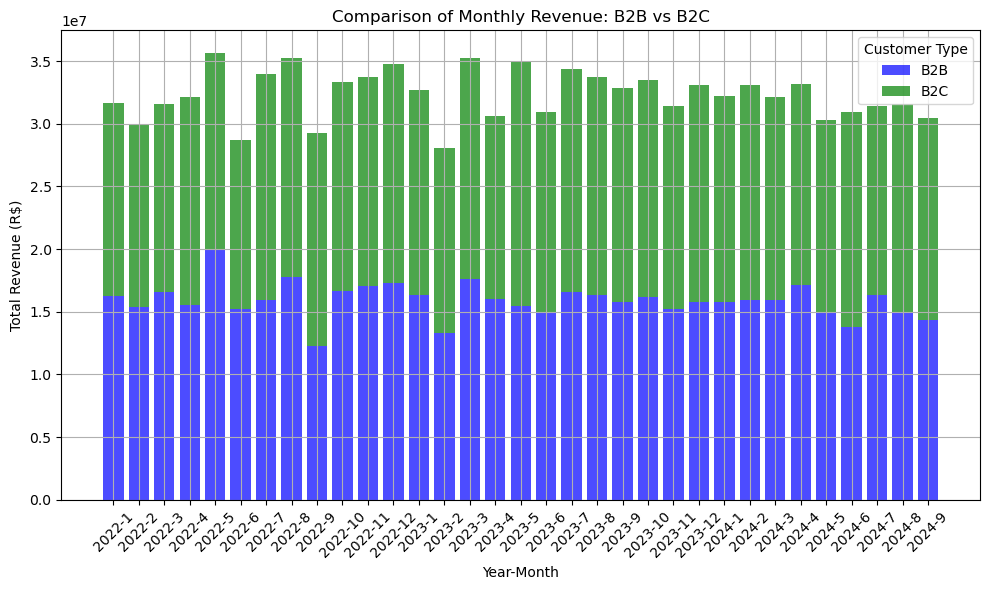

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only 'b2b' and 'b2c' clients
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2b', :]
db_b2c = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2c', :]

# Convert 'Data da Venda' to datetime
db_b2b['Data da Venda'] = pd.to_datetime(db_b2b['Data da Venda'], format='%Y-%m')
db_b2c['Data da Venda'] = pd.to_datetime(db_b2c['Data da Venda'], format='%Y-%m')

# Extract year and month
db_b2b['Year'] = db_b2b['Data da Venda'].dt.year
db_b2b['Month'] = db_b2b['Data da Venda'].dt.month
db_b2c['Year'] = db_b2c['Data da Venda'].dt.year
db_b2c['Month'] = db_b2c['Data da Venda'].dt.month

# Group by Year and Month for both B2B and B2C
revenue_by_month_b2b = db_b2b.groupby(['Year', 'Month'])['Preço de Venda (R$)'].sum().reset_index()
revenue_by_month_b2c = db_b2c.groupby(['Year', 'Month'])['Preço de Venda (R$)'].sum().reset_index()

# Merge B2B and B2C revenue data
revenue_b2b_b2c = pd.merge(revenue_by_month_b2b, revenue_by_month_b2c, on=['Year', 'Month'], how='outer', suffixes=('_B2B', '_B2C'))

# Plot comparison between B2B and B2C revenue
plt.figure(figsize=(10, 6))

# Bar chart for B2B revenue
plt.bar(revenue_b2b_b2c['Year'].astype(str) + '-' + revenue_b2b_b2c['Month'].astype(str), 
        revenue_b2b_b2c['Preço de Venda (R$)_B2B'], label='B2B', alpha=0.7, color='blue')

# Bar chart for B2C revenue (stacked on top of B2B)
plt.bar(revenue_b2b_b2c['Year'].astype(str) + '-' + revenue_b2b_b2c['Month'].astype(str), 
        revenue_b2b_b2c['Preço de Venda (R$)_B2C'], label='B2C', alpha=0.7, color='green', 
        bottom=revenue_b2b_b2c['Preço de Venda (R$)_B2B'])

# Add labels and title
plt.title('Comparison of Monthly Revenue: B2B vs B2C')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.grid(True)
plt.tight_layout()
plt.show()


A receita é muito dividida, então não podemos concluir muitos aspectos sobre nossos clientes. Porém vamos insistir um pouco mais para analisar o que cada cliente mais compra, para analisarmos se há algum possível insight com a receita gerada.

In [97]:
# Filter the dataset for B2B clients
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2b', :]

# Group by 'Marca do Carro' and count how many times each car brand is bought
most_bought_brand_b2b = db_b2b['Marca do Carro'].value_counts()

# Display the result for B2B
print("Most purchased car brands by B2B clients:")
print(most_bought_brand_b2b)


Most purchased car brands by B2B clients:
honda         902
hyundai       859
ford          838
volkswagen    811
chevrolet     805
nissan        802
toyota        799
Name: Marca do Carro, dtype: int64


In [98]:
# Group by 'Marca do Carro' and sum the 'Preço de Venda (R$)' for B2B clients
revenue_by_brand_b2b = db_b2b.groupby('Marca do Carro')['Preço de Venda (R$)'].sum().sort_values(ascending=False)

# Display the result for B2B
print("Car brands that aggregate the most revenue for B2B clients:")
print(revenue_by_brand_b2b)



Car brands that aggregate the most revenue for B2B clients:
Marca do Carro
honda         81797929.94
hyundai       76955921.95
ford          75094255.37
volkswagen    73870190.00
nissan        72743730.77
toyota        72293792.35
chevrolet     71642636.83
Name: Preço de Venda (R$), dtype: float64


In [99]:
# Filter the dataset for B2B clients
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2b', :]

# Group by 'Marca do Carro' and sum the 'Preço de Venda (R$)' for each brand
revenue_by_brand_b2b = db_b2b.groupby('Marca do Carro')['Preço de Venda (R$)'].sum()

# Calculate the total revenue for all brands (B2B clients)
total_revenue_b2b = revenue_by_brand_b2b.sum()

# Calculate the proportion of revenue for each brand
b2b_brand_revenue_proportion = revenue_by_brand_b2b / total_revenue_b2b

# Display the proportion of revenue by car brand for B2B clients
print("Proportion of total revenue by car brand for B2B clients:")
print(b2b_brand_revenue_proportion)


Proportion of total revenue by car brand for B2B clients:
Marca do Carro
chevrolet     0.136619
ford          0.143201
honda         0.155984
hyundai       0.146751
nissan        0.138718
toyota        0.137860
volkswagen    0.140867
Name: Preço de Venda (R$), dtype: float64


In [100]:
# Filter the dataset for B2B clients
db_b2b = db_alterado.loc[db_alterado['Tipo de Cliente'] == 'b2b', :]

# Group by 'Marca do Carro' and sum the 'Preço de Venda (R$)' for each brand
revenue_by_brand_b2b = db_b2b.groupby('Marca do Carro')['Preço de Venda (R$)'].sum()

# Calculate the total revenue for all brands (B2B clients)
total_revenue_b2b = revenue_by_brand_b2b.sum()

# Calculate the proportion of revenue for each brand
b2b_brand_revenue_proportion = revenue_by_brand_b2b / total_revenue_b2b

# Display the proportion of revenue by car brand for B2B clients
print("Proportion of total revenue by car brand for B2B clients:")
print(b2b_brand_revenue_proportion)


Proportion of total revenue by car brand for B2B clients:
Marca do Carro
chevrolet     0.136619
ford          0.143201
honda         0.155984
hyundai       0.146751
nissan        0.138718
toyota        0.137860
volkswagen    0.140867
Name: Preço de Venda (R$), dtype: float64


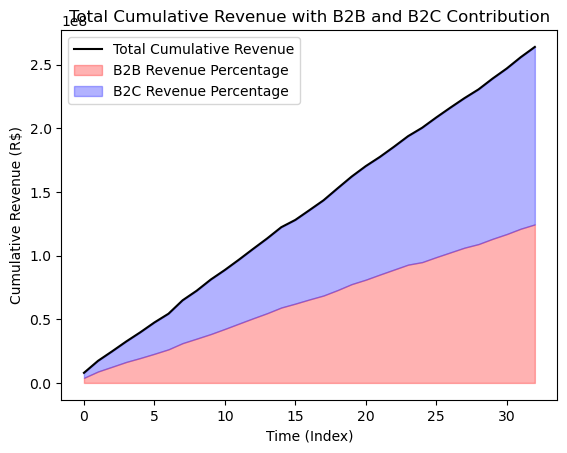

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract month and year from 'Data de Venda'
db_vendas['Mes'] = pd.to_datetime(db_alterado['Data da Venda'], format='%Y-%m').dt.month
db_vendas['Ano'] = pd.to_datetime(db_alterado['Data da Venda'], format='%Y-%m').dt.year

# Step 2: Filter out sales that were cancelled or payments are pending (if applicable)
db_vendas_filtered = db_vendas[(db_vendas['Cancelamento da Venda'] != 'sim') & (db_vendas['Status do Pagamento'] != 'pendente')]

# Step 3: Group by year, month, and customer type, then calculate total revenue for each group
monthly_revenue = db_vendas_filtered.groupby(['Mes', 'Ano', 'Tipo de Cliente'])['Preço de Venda (R$)'].sum().reset_index()

# Step 4: Create two separate DataFrames for B2B and B2C
monthly_revenue_b2b = monthly_revenue[monthly_revenue['Tipo de Cliente'] == 'b2b'].copy()
monthly_revenue_b2c = monthly_revenue[monthly_revenue['Tipo de Cliente'] == 'b2c'].copy()

# Step 5: Calculate cumulative revenue for B2B and B2C clients
monthly_revenue_b2b['Cumulative_B2B'] = monthly_revenue_b2b['Preço de Venda (R$)'].cumsum()
monthly_revenue_b2c['Cumulative_B2C'] = monthly_revenue_b2c['Preço de Venda (R$)'].cumsum()

# Step 6: Merge the two DataFrames (B2B and B2C) on Year and Month, fill missing values with 0
merged_revenue = pd.merge(monthly_revenue_b2b[['Ano', 'Mes', 'Cumulative_B2B']],
                          monthly_revenue_b2c[['Ano', 'Mes', 'Cumulative_B2C']],
                          on=['Ano', 'Mes'], how='outer').fillna(0)

# Step 7: Calculate the total cumulative revenue and percentage contributions for each type
merged_revenue['Total_Cumulative'] = merged_revenue['Cumulative_B2B'] + merged_revenue['Cumulative_B2C']
merged_revenue['Percentage_B2B'] = (merged_revenue['Cumulative_B2B'] / merged_revenue['Total_Cumulative']) * 100
merged_revenue['Percentage_B2C'] = (merged_revenue['Cumulative_B2C'] / merged_revenue['Total_Cumulative']) * 100

# Plot total cumulative revenue
plt.plot(merged_revenue['Total_Cumulative'], label='Total Cumulative Revenue', color='black')

# Shade the area for B2B and B2C percentages
plt.fill_between(range(len(merged_revenue)), 0, merged_revenue['Total_Cumulative'] * (merged_revenue['Percentage_B2B'] / 100), 
                 color='red', alpha=0.3, label='B2B Revenue Percentage')
plt.fill_between(range(len(merged_revenue)), 
                 merged_revenue['Total_Cumulative'] * (merged_revenue['Percentage_B2B'] / 100), 
                 merged_revenue['Total_Cumulative'], color='blue', alpha=0.3, label='B2C Revenue Percentage')

plt.title('Total Cumulative Revenue with B2B and B2C Contribution')
plt.xlabel('Time (Index)')
plt.ylabel('Cumulative Revenue (R$)')
plt.legend()
plt.show()


Pivotando a estratégia, já que as conclusões são poucas. Agora hei de analisar a receita mensal em cada ano para ver se é possível concluir algo a partir disso.

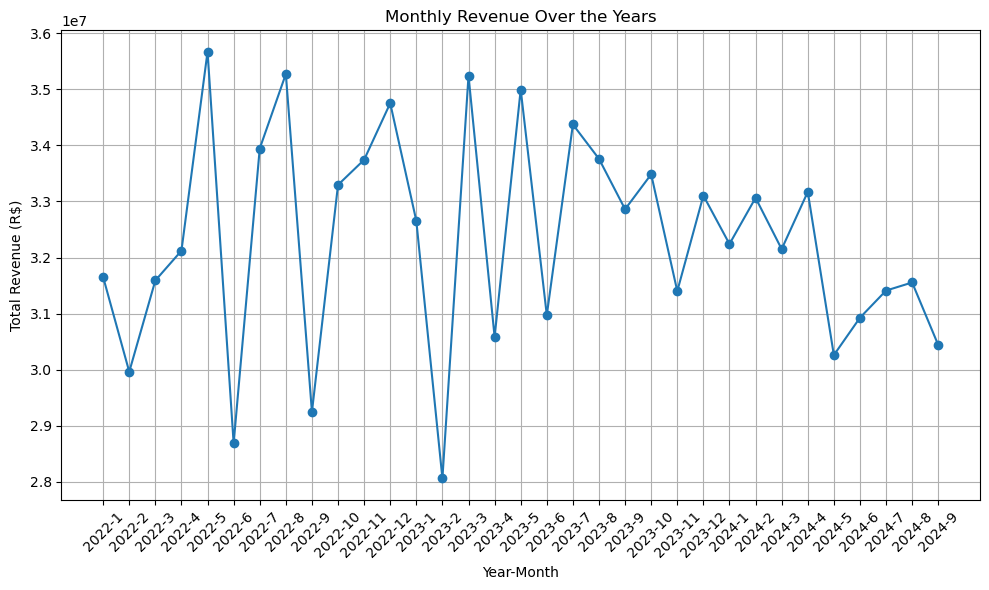

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Data da Venda' is in the format Year-Month (e.g., '2023-08')
# Convert 'Data da Venda' to datetime if it's not already
db_alterado['Data da Venda'] = pd.to_datetime(db_alterado['Data da Venda'], format='%Y-%m')

# Extract year and month
db_alterado['Year'] = db_alterado['Data da Venda'].dt.year
db_alterado['Month'] = db_alterado['Data da Venda'].dt.month

# Group by Year and Month and calculate total revenue for each month
revenue_by_month = db_alterado.groupby(['Year', 'Month'])['Preço de Venda (R$)'].sum()

# Reset the index to flatten the grouped data for easier plotting
revenue_by_month = revenue_by_month.reset_index()

# Plot the revenue by month
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month['Year'].astype(str) + '-' + revenue_by_month['Month'].astype(str), revenue_by_month['Preço de Venda (R$)'], marker='o')
plt.title('Monthly Revenue Over the Years')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Pode ser observado uma grande oscilação em relação aos meses, ou seja, as vendas são bastante instáveis, possuindo uma descontinuidade bastante grande. Devemos entender o motivo disso, se isso é algo causado por uma falta de clientes, individamento, ou sobra de carros.

O gráfico nos indica que o menor número de vendas global é em fevereiro. Devemos entender o motivo dessa queda em todos os anos, e por que a cada ano após ela, a queda foi amenizando.

In [103]:
from prophet import Prophet


In [104]:
# Importação das bibliotecas para analise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
from IPython.display import clear_output
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Button(description="Click Me")
display(button)


Button(description='Click Me', style=ButtonStyle())

In [106]:

# Step 1: Ensure 'Data da Venda' is in datetime format
db_forecast = db_alterado.copy()  # Use your already filtered db_alterado for vendas
db_forecast['Data da Venda'] = pd.to_datetime(db_forecast['Data da Venda'], errors='coerce')  # Convert to datetime

# Check if there are any rows where the conversion failed (invalid dates)
invalid_dates = db_forecast['Data da Venda'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} rows have invalid dates and were set to NaT.")

# Step 2: Extract month and year from 'Data da Venda'
db_forecast['Mes'] = db_forecast['Data da Venda'].dt.month
db_forecast['Ano'] = db_forecast['Data da Venda'].dt.year

# Step 3: Filter out sales with pending payments
db_forecast_filtered = db_forecast[db_forecast['Status do Pagamento'] != 'pendente']

# Step 4: Define the function that will make predictions
def forecast_revenue():
    # Clear the previous output (to update the same plot instead of creating new ones)
    clear_output(wait=True)

    # Step 4.1: Aggregate revenue by month (sum the 'Preço de Venda (R$)')
    monthly_revenue_forecast = db_forecast_filtered.groupby(['Ano', 'Mes'])['Preço de Venda (R$)'].sum().reset_index(name='Revenue')

    # Ensure there's enough data for forecasting
    if len(monthly_revenue_forecast) < 5:
        print("Not enough data for forecasting.")
        return

    # Step 4.2: Prepare the data for Prophet
    monthly_revenue_forecast['ds'] = pd.to_datetime(monthly_revenue_forecast['Ano'].astype(str) + '-' + monthly_revenue_forecast['Mes'].astype(str) + '-01')
    monthly_revenue_forecast['y'] = monthly_revenue_forecast['Revenue']

    # Step 4.3: Train Prophet model on filtered data
    model = Prophet()
    model.fit(monthly_revenue_forecast[['ds', 'y']])

    # Step 4.4: Forecast the next 12 months
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    # Step 4.5: Plot the forecast
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    plt.title(f'Revenue Forecast for the Next 12 Months')
    plt.xlabel('Date')
    plt.ylabel('Revenue (R$)')
    plt.show()

# Step 5: Create a button to trigger the forecast and display the interface
forecast_button = widgets.Button(description="Generate Revenue Forecast")
forecast_button.on_click(lambda x: forecast_revenue())

# Step 6: Display the button to trigger the forecast
display(forecast_button)


Button(description='Generate Revenue Forecast', style=ButtonStyle())

In [107]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Convert 'Data da Venda' to datetime
db_forecast = db_alterado.copy()
db_forecast['Data da Venda'] = pd.to_datetime(db_forecast['Data da Venda'], errors='coerce')

# Extract month and year
db_forecast['Mes'] = db_forecast['Data da Venda'].dt.month
db_forecast['Ano'] = db_forecast['Data da Venda'].dt.year

# Filter out sales with pending payments
db_forecast_filtered = db_forecast[db_forecast['Status do Pagamento'] != 'pendente']

# Define the function that will make predictions
def forecast_revenue():
    clear_output(wait=True)
    
    monthly_revenue_forecast = db_forecast_filtered.groupby(['Ano', 'Mes'])['Preço de Venda (R$)'].sum().reset_index(name='Revenue')
    
    if len(monthly_revenue_forecast) < 5:
        print("Not enough data for forecasting.")
        return
    
    monthly_revenue_forecast['ds'] = pd.to_datetime(monthly_revenue_forecast['Ano'].astype(str) + '-' + monthly_revenue_forecast['Mes'].astype(str) + '-01')
    monthly_revenue_forecast['y'] = monthly_revenue_forecast['Revenue']
    
    model = Prophet()
    model.fit(monthly_revenue_forecast[['ds', 'y']])
    
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    plt.title(f"Revenue Forecast for the Next 12 Months")
    plt.show()

# Create a button to trigger the forecast
forecast_button = widgets.Button(description="Generate Revenue Forecast")
forecast_button.on_click(lambda x: forecast_revenue())

# Try printing if widgets don't work
print("Forecast button should appear below")

# Display the button to trigger the forecast
display(forecast_button)


Forecast button should appear below


Button(description='Generate Revenue Forecast', style=ButtonStyle())

In [108]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Button(description="Test Button")
display(button)


Button(description='Test Button', style=ButtonStyle())